0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Text(0.5, 1.0, 'DR4Q')

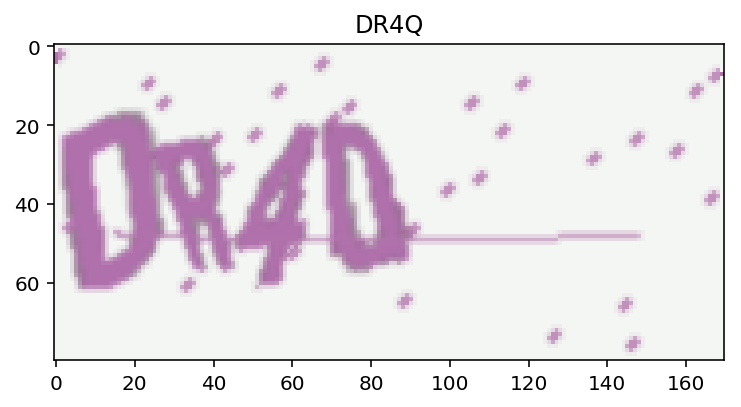

In [4]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm, trange


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string

folder_path = '100000_train/'

characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len, n_class = 170, 80, 4, len(characters)

generator = ImageCaptcha(width=width, height=height, fonts=['font/BEBAS.ttf'])
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

plt.imshow(img)
plt.title(random_str)

In [5]:
def random_color(start, end, opacity=None):
    red = random.randint(start, end)
    green = random.randint(start, end)
    blue = random.randint(start, end)
    if opacity is None:
        return (red, green, blue)
    return (red, green, blue, opacity)

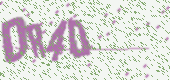

In [6]:
color = random_color(10, 200, random.randint(220, 255))
generator.create_noise_dots(img, color, width=1, number=1000)

In [7]:
# gen_background = (211,211,211)
gen_background = (50, 50, 50)#(220,220,220, 0)
gen_color = (255, 255, 255)
im = generator.create_captcha_image("95MQ",gen_background, gen_color)

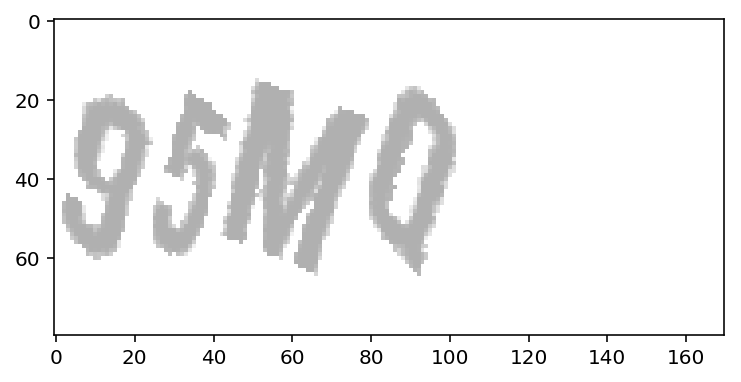

In [8]:
plt.imshow(im)

In [335]:
from PIL import Image
from PIL.ImageDraw import Draw
from PIL.ImageFont import truetype
from PIL import ImageOps

wd = 170
he = 80

def cust_create_captcha_image(chars, color, background):
        """Create the CAPTCHA image itself.
        :param chars: text to be generated.
        :param color: color of the text.
        :param background: color of the background.
        The color should be a tuple of 3 numbers, such as (0, 255, 255).
        """
#         image = Image.new('RGB', (self._width, self._height), background)
        image = Image.new('RGB', (wd, he), background)
        draw = Draw(image)

        
        table  =  []
        for  i  in  range( 256 ):
            table.append( i * 1.97 )
        
        def _draw_character(c):
            font = truetype('font/BEBAS.ttf', 50)
            w, h = draw.textsize(c, font=font)

            dx = random.randint(0, 4)
            dy = random.randint(0, 6)
            im = Image.new('RGB', (w + dx, h + dy))
            Draw(im).text((dx, dy), c, font=font, fill=color)

#             rotate
            im = im.crop(im.getbbox())
            im = im.rotate(random.uniform(-15, 15), Image.BILINEAR, expand=1)

            # warp
#             dx = w * random.uniform(0.1, 0.3)
#             dy = h * random.uniform(0.2, 0.3)
#             x1 = int(random.uniform(-dx, dx))
#             y1 = int(random.uniform(-dy, dy))
#             x2 = int(random.uniform(-dx, dx))
#             y2 = int(random.uniform(-dy, dy))
#             w2 = w + abs(x1) + abs(x2)
#             h2 = h + abs(y1) + abs(y2)
#             data = (
#                 x1, y1,
#                 -x1, h2 - y2,
#                 w2 + x2, h2 + y2,
#                 w2 - x2, -y1,
#             )
#             im = im.resize((w2, h2))
#             im = im.transform((w, h), Image.QUAD, data)
            return im

        images = []
        for c in chars:
            if random.random() > 0.5:
                images.append(_draw_character(" "))
            images.append(_draw_character(c))
        
#         for i in range(len(images)-1):
#             Image.blend(images[i], images[i+1], )
            

        text_width = sum([im.size[0] for im in images])

        width = max(text_width, wd)
        image = image.resize((width, he))

        average = int(text_width / len(chars))
        rand = int(0.25 * average)
        offset = int(average * 0.1)

        for im in images:
            w, h = im.size
            mask = im.convert('L').point(table)
                
#             mask = im.convert("L")
            image.paste(ImageOps.colorize(mask, (0,0,0), (0,0,0)), (offset, int((he - h) / 2)), mask)
            offset = offset + w + random.randint(-rand, 0)

        if width > wd:
            image = image.resize((wd, he))

        return image

In [336]:
a = cust_create_captcha_image("95MQ", (255,255,255), (255,255,255, 0))

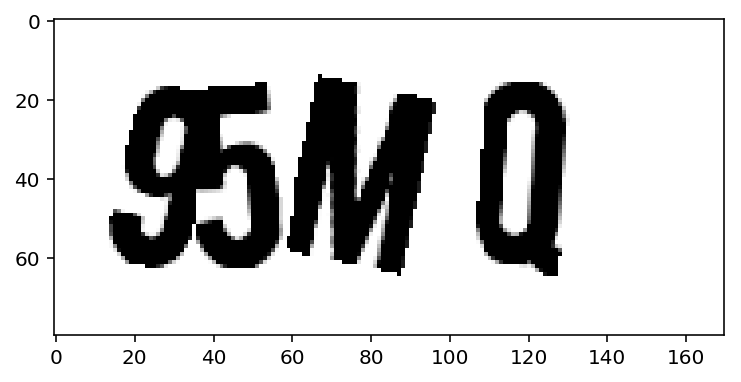

In [337]:
plt.imshow(a)

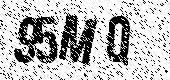

In [338]:
generator.create_noise_dots(a, (0,0,0), width=1, number=800)
generator.create_noise_dots(a, (230,230,230), width=1, number=1200)

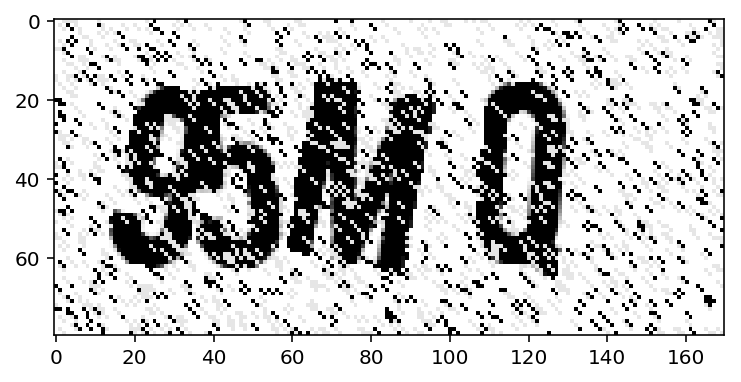

In [339]:
plt.imshow(a)

In [340]:
def create_noise_curve(image, color):
    w, h = image.size
#     x1 = random.randint(0, int(w / 5))
#     x2 = random.randint(w - int(w / 5), w)
#     y1 = random.randint(int(h / 5), h - int(h / 5))
#     y2 = random.randint(y1, h - int(h / 5))
#     points = [x1, y1, x2, y2]
#     end = random.randint(160, 200)
#     start = random.randint(0, 20).
    points = [-20, 20, 160, 60]
    start = 180
    end = 0
    Draw(image).arc(points, start, end, fill=color, width=5)
    return image

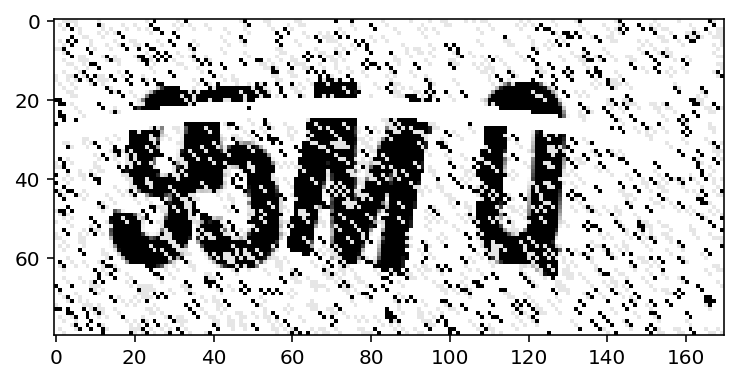

In [341]:
b = create_noise_curve(a, (255,255,255,0))
plt.imshow(b)

In [342]:
# draw = Draw(a)
# font = truetype('font/BEBAS.ttf', 50)
# draw.text((0, 0),"95MQ",(0,0,0),font=font)

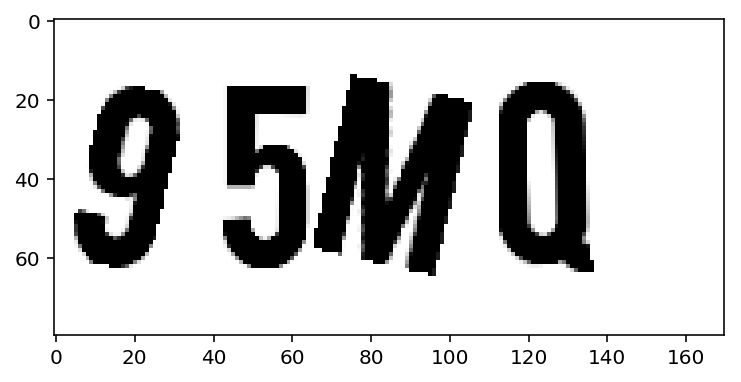

In [406]:
word = cust_create_captcha_image("95MQ", (255,255,255), (255,255,255))
plt.imshow(word)

In [407]:
import numpy as np
pix_word = np.array(word)
pix_word

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [408]:
b.getpixel((0,0))

(255, 255, 255)

In [409]:
image = Image.new('RGB', (170, 80), (255,255,255))

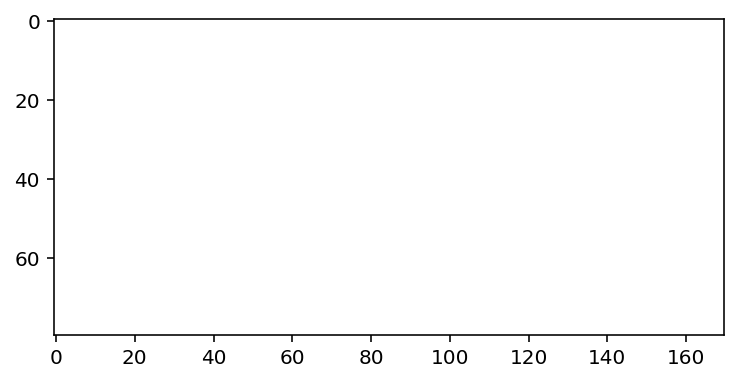

In [410]:
plt.imshow(image)

In [411]:
image_curve = create_noise_curve(image, (0,0,0))

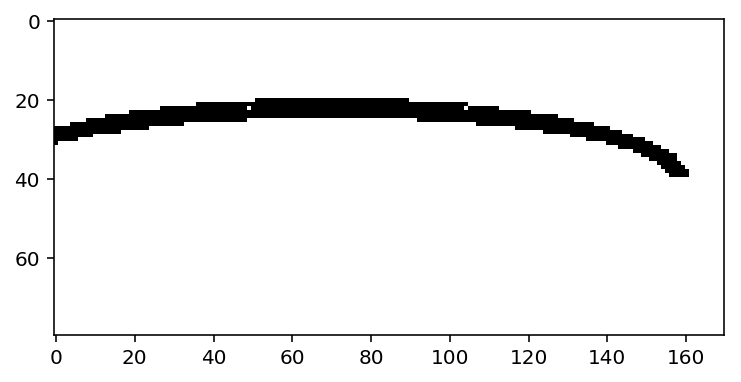

In [412]:
plt.imshow(image_curve)

In [413]:
pix_curve = np.array(image_curve)
pix_curve

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [414]:
result = pix_word ^ pix_curve
result.shape
result = ~result 
result = result & 211 
# 0 0 -> 0 1 1-> 1

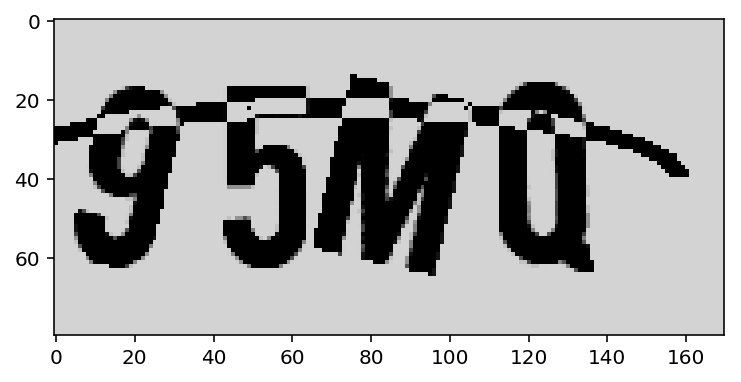

In [415]:
img = Image.fromarray(np.uint8(result))
plt.imshow(img)

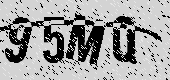

In [416]:
generator.create_noise_dots(img, (0,0,0), width=1, number=300)
generator.create_noise_dots(img, (230,230,230), width=1, number=500)

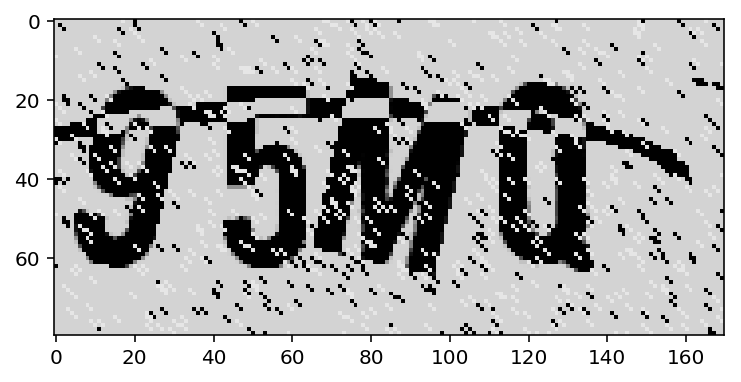

In [417]:
plt.imshow(img)

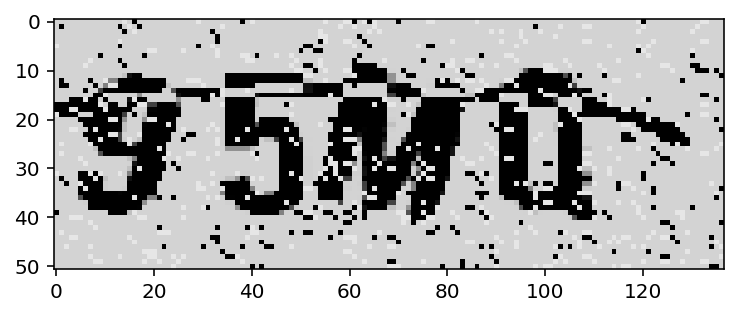

In [418]:
resize_img = img.resize((120, 56))
resize_img1 = resize_img.resize((137, 51))
plt.imshow(resize_img1)